**DETECCIÓN DE IRIS** <br>
Alumno: Daniel Iván Cruz Flores


Tamaño imagen 1: (600, 600, 3) pix




<Figure size 432x288 with 0 Axes>

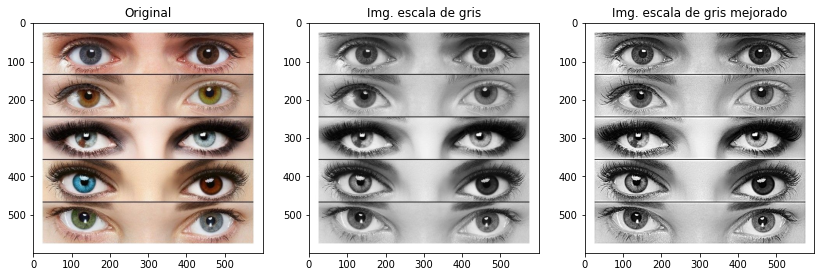

In [116]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

from math import sqrt

# Importamos librerías para manejo de tiempo
import time

#imagen en color
img1 = cv.imread('eyes.jpg')
imgRGB = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

########## mejora de imagen para suavisar y realzar bordes #####################
gaussian_img = cv.GaussianBlur(gray, (0,0),2.2)
unsharp_image = cv.addWeighted(gray, 2.0, gaussian_img, -1.0, 0)
################################################################################

# Dimensión de la imagen
print('\nTamaño imagen 1: {} pix'.format(img1.shape))
print('\n')

# Nueva figura
fig = plt.figure()
plt.figure(figsize=(14,8))

# Imagen original
ax1=plt.subplot(131)
ax1.imshow(imgRGB)
ax1.set_title('Original')

ax2=plt.subplot(132)
ax2.imshow(gray,cmap="gray")
ax2.set_title('Img. escala de gris')


ax2=plt.subplot(133)
ax2.imshow(unsharp_image,cmap="gray")
ax2.set_title('Img. escala de gris mejorado')

fig.tight_layout()    
plt.show()



<Figure size 432x288 with 0 Axes>

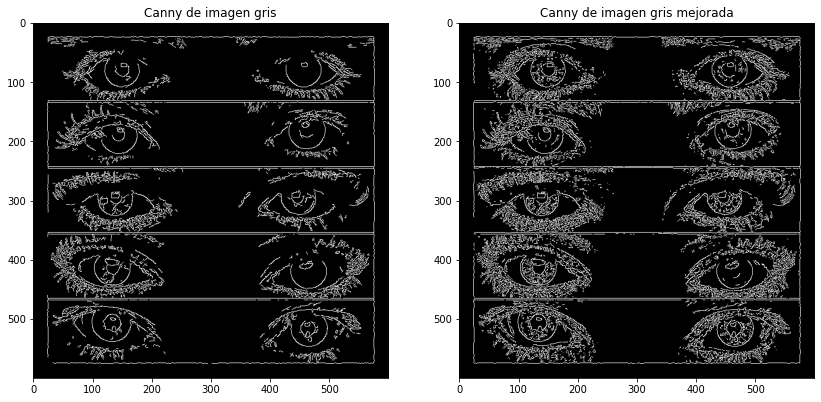

In [117]:
# detección de bordes
bordes1 = cv.Canny(gray,150,255) ## aplicamos el filtro canny para la deteccion de bordes,
##seleccionamos un umbral minimo de 135 y un maximo de 255
bordes2 = cv.Canny(unsharp_image,190,255) ## aplicamos el filtro canny para la deteccion de bordes,
##seleccionamos un umbral minimo de 135 y un maximo de 255

# Nueva figura
fig = plt.figure()
plt.figure(figsize=(14,8))

# Imagen original
ax1=plt.subplot(121)
ax1.imshow(bordes1,cmap="gray")
ax1.set_title('Canny de imagen gris')

ax2=plt.subplot(122)
ax2.imshow(bordes2,cmap="gray")
ax2.set_title('Canny de imagen gris mejorada')

fig.tight_layout()    
plt.show()

Despues de realizar varias pruebas a la imagen "eyes.jpg" se comprobó que usar una imagen con bordes nos da mejores resultados que una imagen solo en escala de grises. Por tanto para la detección de los iris usamos la imagen de la salida de Canny de la imagen mejorada.


Iris detectados:  7
NOTA: Se considera las pupilas en el centro del iris.



<Figure size 432x288 with 0 Axes>

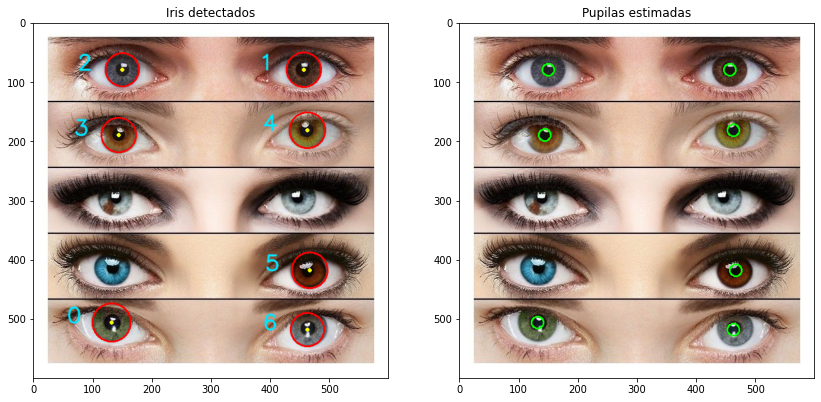

In [118]:
#detectamos el iris de cada ojo
imgRGB2=imgRGB.copy()
centros_iris=[]

########################### IRIS ##############################################
circles1 = cv.HoughCircles(bordes2,cv.HOUGH_GRADIENT,1,100,param1=31,param2=33,minRadius=0,maxRadius=41)
circles = circles1[0,:,:]#Extraer como bidimensional
circles = np.uint16(np.around(circles))#Redondeo, redondeo

idx=0
for i in circles[:]:
  #print(i)
  if(i[2]>20):# el iris tiene un radio mayor a 20px
    centros_iris.append(i)
    cv.circle(imgRGB,(i[0],i[1]),i[2],(255,0,0),2)#
    cv.circle(imgRGB,(i[0],i[1]),2,(255,255,0),2)# 
    font = cv.FONT_HERSHEY_SIMPLEX
    cv.putText(imgRGB,str(idx),(i[0]-75,i[1]), font,1.2,( 0,230,255),2,cv.LINE_AA)
    
    #dibujamos las pupilas estimadas
    cv.circle(imgRGB2,(i[0],i[1]),10,(0,255,0),2)#
    idx=idx+1
    
print("\n ============================================")
print("Iris detectados: ",len(centros_iris))
print("NOTA: Se considera las pupilas en el centro del iris.")
print("============================================\n")

# Nueva figura
fig = plt.figure()
plt.figure(figsize=(14,8))

# Imagen original
ax1=plt.subplot(121)
ax1.imshow(imgRGB)
ax1.set_title('Iris detectados')

ax2=plt.subplot(122)
ax2.imshow(imgRGB2)
ax2.set_title('Pupilas estimadas')

fig.tight_layout()    
plt.show()


 ================= DISTANCIAS ===========================

Distancia [2]------[1]: 306.00
Distancia [3]------[4]: 318.10
Distancia [0]------[6]: 330.22




<Figure size 432x288 with 0 Axes>

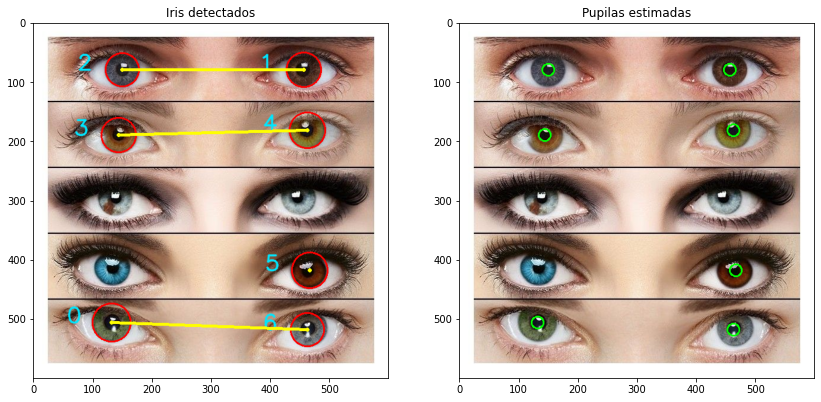

In [119]:
# se dibujan las rectas y se encuentra las distancias para los iris encontrados
def distancia_euclideana(x1,y1,x2,y2):
    puntoA=[x1,y1]
    puntoB=[x2,y2]
    a=(int(puntoA[0])-int(puntoB[0]))**2
    b=(int(puntoA[1])-int(puntoB[1]))**2
    d=sqrt(a+b)
    return d


print("\n ================= DISTANCIAS ===========================\n")
#----linea del ojo 2 al 1----------------------------
arreglo=centros_iris[1]
arreglo2=centros_iris[2]
cv.line(imgRGB,(arreglo[0],arreglo[1]),(arreglo2[0],arreglo2[1]),(255,255,0),3,cv.LINE_8)
d = distancia_euclideana(arreglo[0],arreglo[1],arreglo2[0],arreglo2[1])
print("Distancia [2]------[1]: {0:.2f}".format(d))

#----linea del ojo 3 al 4----------------------------
arreglo=centros_iris[3]
arreglo2=centros_iris[4]
cv.line(imgRGB,(arreglo[0],arreglo[1]),(arreglo2[0],arreglo2[1]),(255,255,0),3,cv.LINE_8)
d = distancia_euclideana(arreglo[0],arreglo[1],arreglo2[0],arreglo2[1])
print("Distancia [3]------[4]: {0:.2f}".format(d))

#----linea del ojo 0 al 6----------------------------
arreglo=centros_iris[0]
arreglo2=centros_iris[6]
cv.line(imgRGB,(arreglo[0],arreglo[1]),(arreglo2[0],arreglo2[1]),(255,255,0),3,cv.LINE_8)
d = distancia_euclideana(arreglo[0],arreglo[1],arreglo2[0],arreglo2[1])
print("Distancia [0]------[6]: {0:.2f}".format(d))
print("\n =======================================================\n")

# Nueva figura
fig = plt.figure()
plt.figure(figsize=(14,8))

# Imagen original
ax1=plt.subplot(121)
ax1.imshow(imgRGB)
ax1.set_title('Iris detectados')

ax2=plt.subplot(122)
ax2.imshow(imgRGB2)
ax2.set_title('Pupilas estimadas')

fig.tight_layout()    
plt.show()

**CONCLUSIONES:** con el procedimiento aplicado se demostro que si usamos una imagen con bordes definidos podemos obtener mejores resultados. El procedimiento aplicado obtuvo un reconocimiento del 70% del total de iris en la imagen.